<a href="https://colab.research.google.com/github/aveerdram/Exploratory-Data-Analysis/blob/main/%D0%9F%D0%B8%D0%BD%D0%B3%D0%B2%D0%B8%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('penguins.csv')

train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


**Проведите первичное статистическое исследование количественных (минимальный, максимальный значения столбцов, медиана и т.п.) и категориальных признаков.**

In [ ]:
train.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
train.describe(include='object')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


**Определите наличие пропусков в данных. Предложите способы заполнения пропусков, но пока не заполняйте**

In [ ]:
train.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
train[train.sex.isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


*Заметим, что у двух пингвинов не заполнен ни один признак, кроме вида и острова. Целесообразно рассмотреть их к удалению. А для избавления пропусков у оставшихся 9 пингвинов в признаке 'пол' воспользуемся методом k-ближайших соседей.*

**Для нескольких признаков (количественных и категориальных) подберите лучший способ визуализации распределения значений.**

In [ ]:
sns.set()

In [ ]:
sns.set_style('darkgrid')

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

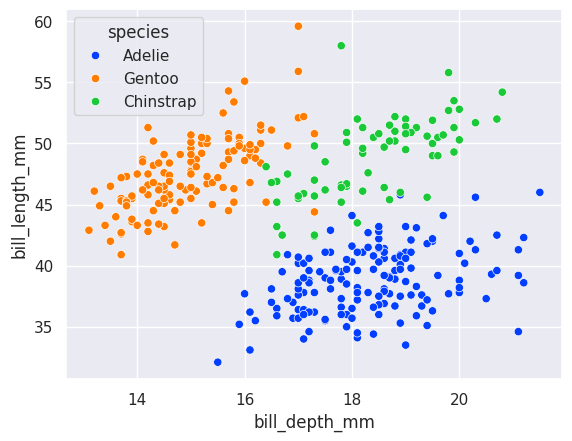

In [ ]:
sns.scatterplot(data=train, x='bill_depth_mm', y='bill_length_mm', palette='bright',  hue='species')

# Длина и глубина bill у разных видов

<ipython-input-374-da1a343bc191>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x='island', y='body_mass_g', palette='bright')


<Axes: xlabel='island', ylabel='body_mass_g'>

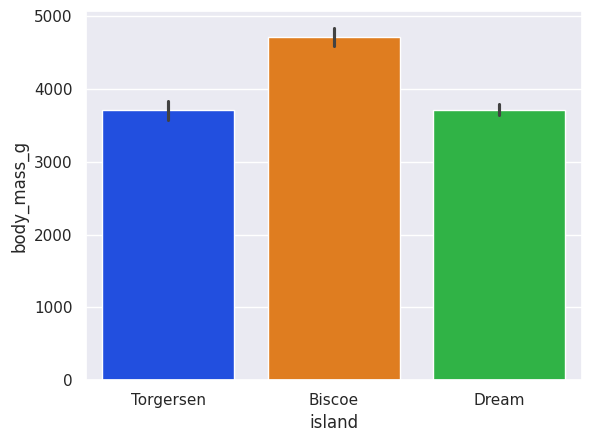

In [ ]:
sns.barplot(data=train, x='island', y='body_mass_g', palette='bright')

# Масса тела на разных островах

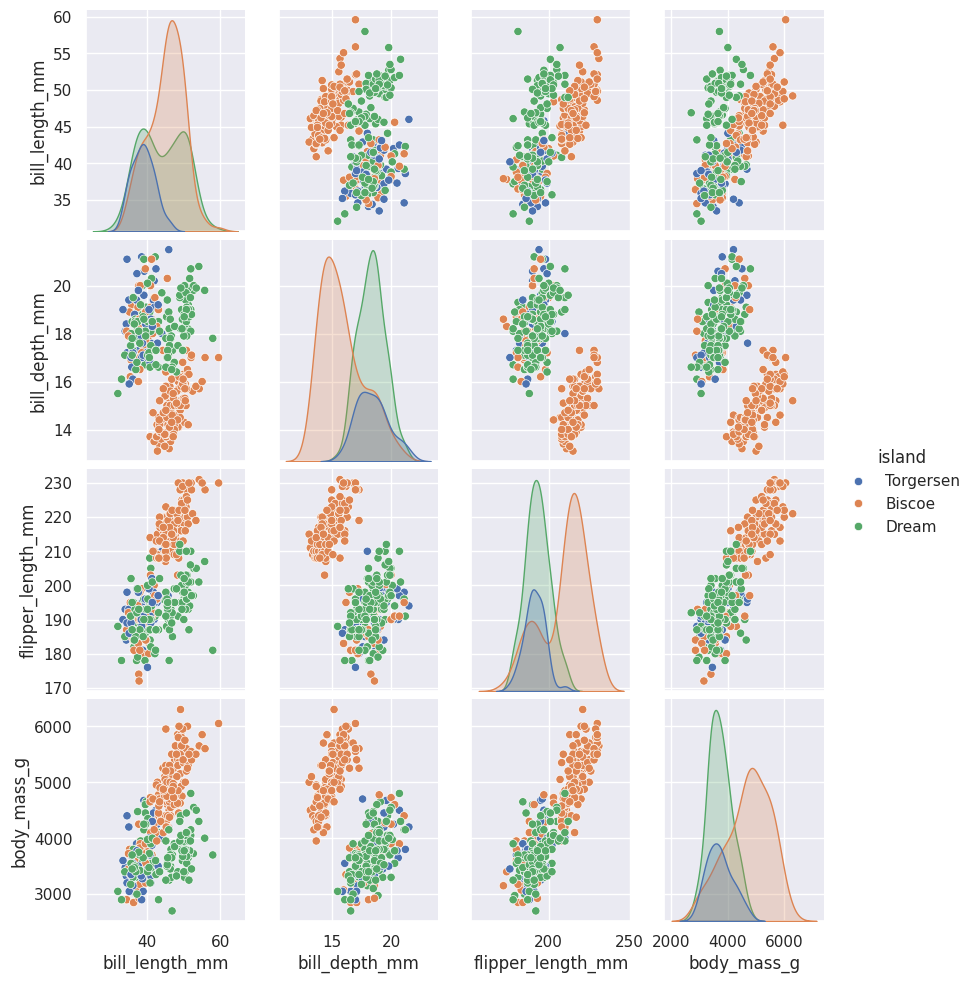

In [ ]:
sns.pairplot(
    data=train,
    aspect=.85,
    hue='island');

**Проверьте наличие отклонений и аномалий в распределении значений признаков.**

<Axes: xlabel='island', ylabel='bill_depth_mm'>

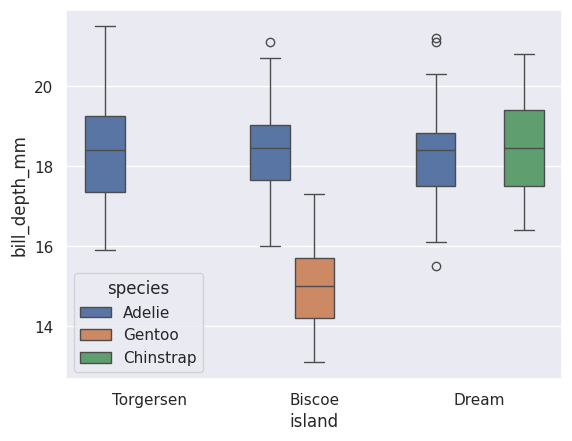

In [ ]:
sns.boxplot(data=train, x='island', y='bill_depth_mm', hue='species', gap=.1)

<Axes: xlabel='island', ylabel='bill_length_mm'>

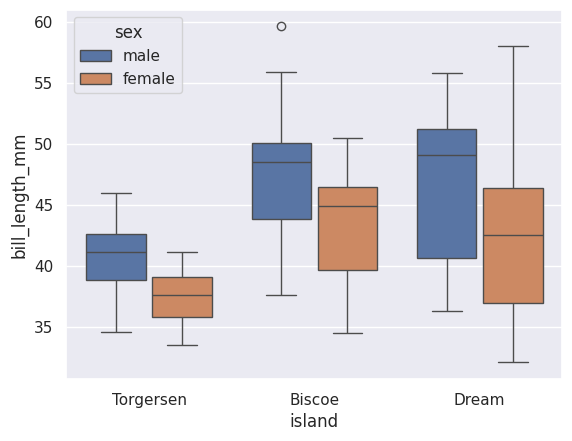

In [ ]:
sns.boxplot(data=train, x='island', y='bill_length_mm', hue='sex', gap=.1)

<Axes: xlabel='island', ylabel='flipper_length_mm'>

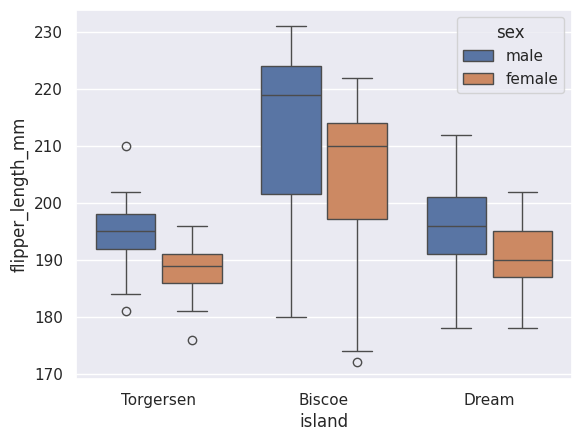

In [ ]:
sns.boxplot(data=train, x='island', y='flipper_length_mm', hue='sex', gap=.1)

**Сделайте предположение о возможности использования каких-либо признаков или их сочетаний для заполнения пропусков. Заполните пропуски.**

In [ ]:
train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [ ]:
train.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
train[train['sex'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [ ]:
train = train.drop(index=[3, 271]).reset_index()
train.reset_index()

train = train.drop(columns=['index'])

In [ ]:
train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
337,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
338,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
339,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
340,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [ ]:
train.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [ ]:
train[train['sex'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
8,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
9,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
10,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
46,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
177,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
217,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
255,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
267,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [ ]:
train.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


**Рассмотрите категориальные признаки, выберите наиболее подходящий способ кодирования для каждого.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# species
species_encoded = label_encoder.fit_transform(train.species)
species_new = pd.DataFrame({'species_encoded' : species_encoded})
train = train.join(species_new)

# island
island_encoded = label_encoder.fit_transform(train.island)
island_new = pd.DataFrame({'island_encoded' : island_encoded})
train = train.join(island_new)

# sex
sex_encoded = label_encoder.fit_transform(train.sex)
sex_new = pd.DataFrame({'sex_encoded' : sex_encoded})
train = train.join(sex_new)

train = train.drop(columns=['species', 'island', 'sex'])

train

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_encoded,island_encoded,sex_encoded
0,39.1,18.7,181.0,3750.0,0,2,1
1,39.5,17.4,186.0,3800.0,0,2,0
2,40.3,18.0,195.0,3250.0,0,2,0
3,36.7,19.3,193.0,3450.0,0,2,0
4,39.3,20.6,190.0,3650.0,0,2,1
...,...,...,...,...,...,...,...
337,55.8,19.8,207.0,4000.0,1,1,1
338,43.5,18.1,202.0,3400.0,1,1,0
339,49.6,18.2,193.0,3775.0,1,1,1
340,50.8,19.0,210.0,4100.0,1,1,1


*Продолжим удаление*

In [ ]:
train['sex_encoded'].unique()

array([1, 0, 2])

Можем увидеть, что label encoder закодировал столбец 'Пол', как:

1 - male

0 - female

2 - None

In [ ]:
nans = list(train[train['sex_encoded'] == 2].index.values)

In [ ]:
train['sex_encoded'].iloc[nans] = None

<ipython-input-390-7803a182c0eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sex_encoded'].iloc[nans] = None


In [ ]:
train.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
species_encoded      0
island_encoded       0
sex_encoded          9
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
train[train.columns] = imputer.fit_transform(train)

In [ ]:
train.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
species_encoded      0
island_encoded       0
sex_encoded          0
dtype: int64

**Примените нормализацию к какому-либо количественному признаку. Визуализируйте результат нормализации.**

*Применим MinMaxScaling:*

$x_{norm}=\dfrac{x-x_{min}}{x_{max}-x_{min}}$

In [ ]:
from sklearn.preprocessing import minmax_scale

mass = train['body_mass_g'].copy()
train['body_mass_g'] = minmax_scale(train['body_mass_g'])

train

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_encoded,island_encoded,sex_encoded
0,39.1,18.7,181.0,0.291667,0.0,2.0,1.0
1,39.5,17.4,186.0,0.305556,0.0,2.0,0.0
2,40.3,18.0,195.0,0.152778,0.0,2.0,0.0
3,36.7,19.3,193.0,0.208333,0.0,2.0,0.0
4,39.3,20.6,190.0,0.263889,0.0,2.0,1.0
...,...,...,...,...,...,...,...
337,55.8,19.8,207.0,0.361111,1.0,1.0,1.0
338,43.5,18.1,202.0,0.194444,1.0,1.0,0.0
339,49.6,18.2,193.0,0.298611,1.0,1.0,1.0
340,50.8,19.0,210.0,0.388889,1.0,1.0,1.0


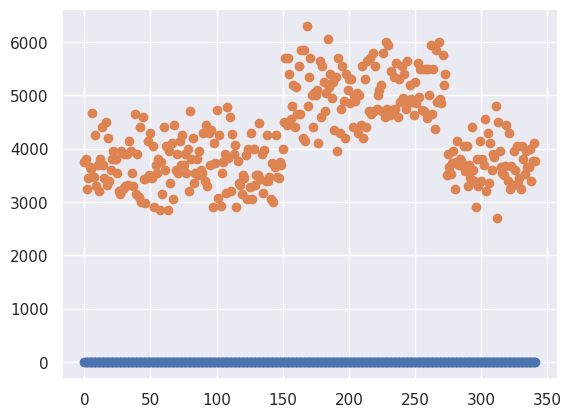

In [ ]:
plt.scatter(train.index, train['body_mass_g'])
plt.scatter(train.index, mass)

plt.show()

**Предположите наличие зависимости какой-либо пары признаков друг от друга. С помощью визуализации подтвердите или опровергните эту зависимость.**

*Рассмотрим пару 'длина ласты' и 'масса тела' пингвина. Предположение: чем больше масса, тем длиннее клюв.*

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

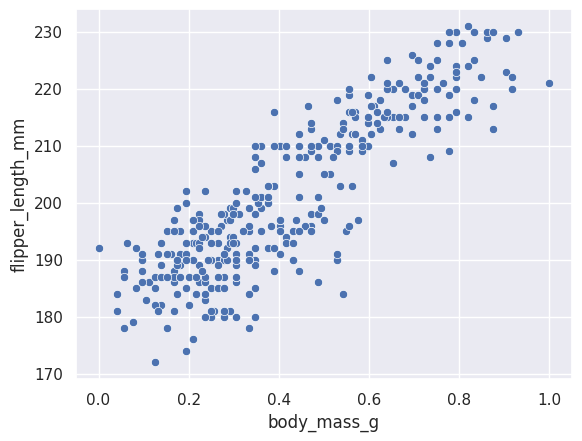

In [ ]:
sns.scatterplot(data = train, x='body_mass_g', y='flipper_length_mm')

*Вывод: зависимость линейная.*

**Постройте «тепловую карту» зависимости признаков.**

<Axes: >

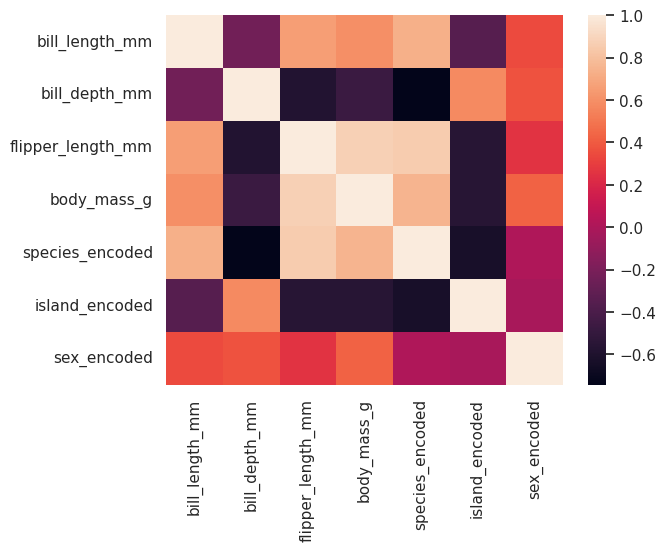

In [ ]:
sns.heatmap(train.corr())

**В качестве итогового вывода сделайте предположение о значимости каждого признака для будущего анализа этого набора данных.**

1. *Самцы крупнее самок*
2. *Основные различия появляются при видовом признаке*
3. *Отклонений, в общем и целом, не обнаружилось*

**Примените метод главных компонент для уменьшения размерности.**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train = train.dropna()

scalar = StandardScaler()
scaled_train = pd.DataFrame(scalar.fit_transform(train))
scaled_train

pca = PCA(n_components = 3)
pca.fit(scaled_train)
data_pca = pca.transform(scaled_train)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head(10)

,PC1,PC2,PC3
0,-2.525026,1.157653,0.146979
1,-2.280880,-0.612736,0.808365
2,-2.336370,-0.506321,1.072085
3,-2.757130,-0.316950,0.623313
4,-2.600828,1.686013,0.236939
5,-2.648000,-0.612435,0.780262
6,-1.715155,1.710720,-0.046625
7,-2.669590,-0.460521,0.185526
8,-2.026444,1.877533,0.376058
9,-2.574023,-0.609491,0.621189
